Project root added to sys.path: d:\Handwritten Digit Recognition


d:\Handwritten Digit Recognition\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 - 3s - 13ms/step - accuracy: 0.8423 - loss: 0.5202
Epoch 2/10
235/235 - 1s - 6ms/step - accuracy: 0.9331 - loss: 0.2223
Epoch 3/10
235/235 - 1s - 6ms/step - accuracy: 0.9513 - loss: 0.1634
Epoch 4/10
235/235 - 2s - 10ms/step - accuracy: 0.9601 - loss: 0.1326
Epoch 5/10
235/235 - 4s - 17ms/step - accuracy: 0.9676 - loss: 0.1075
Epoch 6/10
235/235 - 4s - 16ms/step - accuracy: 0.9717 - loss: 0.0905
Epoch 7/10
235/235 - 3s - 15ms/step - accuracy: 0.9759 - loss: 0.0807
Epoch 8/10
235/235 - 3s - 14ms/step - accuracy: 0.9776 - loss: 0.0712
Epoch 9/10
235/235 - 3s - 14ms/step - accuracy: 0.9797 - loss: 0.0643
Epoch 10/10
235/235 - 3s - 14ms/step - accuracy: 0.9817 - loss: 0.0563
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

 Test Accuracy: 0.9763
⏱ Training time: 29.60 sec
⏱ Prediction time: 3.10 sec

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99    

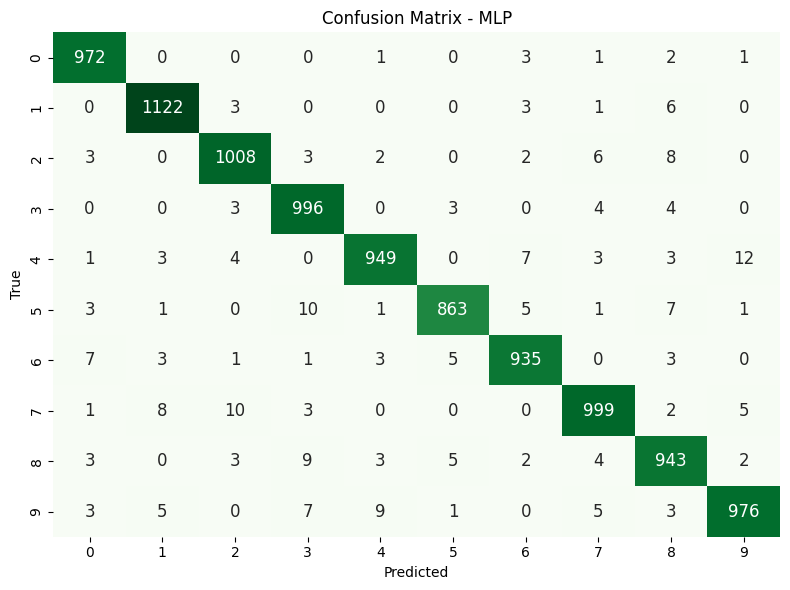

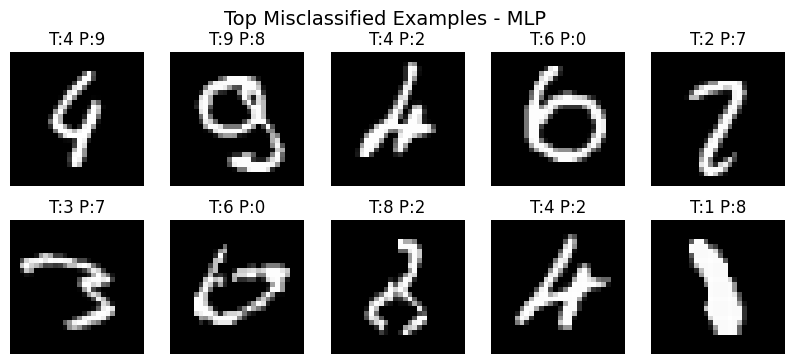

In [1]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load data (normalize recommended for MLP)
X_train, y_train, X_test, y_test = load_mnist(normalise=True)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Take subset for speed (optional)
subset_size = 30000
X_train_sub = X_train_flat[:subset_size]
y_train_sub = y_train[:subset_size]

# One-hot encode labels
y_train_cat = to_categorical(y_train_sub, 10)
y_test_cat = to_categorical(y_test, 10)

# Build MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_train = time.time()
model.fit(X_train_sub, y_train_cat, epochs=10, batch_size=128, verbose=2)
end_train = time.time()

start_pred = time.time()
y_pred_prob = model.predict(X_test_flat)
y_pred_mlp = np.argmax(y_pred_prob, axis=1)
end_pred = time.time()

acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"\n Test Accuracy: {acc_mlp:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

print("\n Classification Report:")
print(classification_report(y_test, y_pred_mlp))

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens", cbar=False, annot_kws={"size": 12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLP")
plt.tight_layout()
plt.show()

misclassified_idx_mlp = np.where(y_pred_mlp != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx_mlp[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_mlp[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Examples - MLP", fontsize=14)
plt.show()


Project root added to sys.path: d:\Handwritten Digit Recognition
Epoch 1/8


d:\Handwritten Digit Recognition\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 2s - 5ms/step - accuracy: 0.8812 - loss: 0.3928
Epoch 2/8
469/469 - 2s - 4ms/step - accuracy: 0.9493 - loss: 0.1673
Epoch 3/8
469/469 - 2s - 3ms/step - accuracy: 0.9626 - loss: 0.1236
Epoch 4/8
469/469 - 2s - 3ms/step - accuracy: 0.9698 - loss: 0.0986
Epoch 5/8
469/469 - 2s - 3ms/step - accuracy: 0.9739 - loss: 0.0846
Epoch 6/8
469/469 - 2s - 3ms/step - accuracy: 0.9761 - loss: 0.0758
Epoch 7/8
469/469 - 2s - 4ms/step - accuracy: 0.9786 - loss: 0.0681
Epoch 8/8
469/469 - 2s - 3ms/step - accuracy: 0.9808 - loss: 0.0605
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step

 Test Accuracy: 0.9785
⏱ Training time: 13.75 sec
⏱ Prediction time: 0.40 sec

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98     

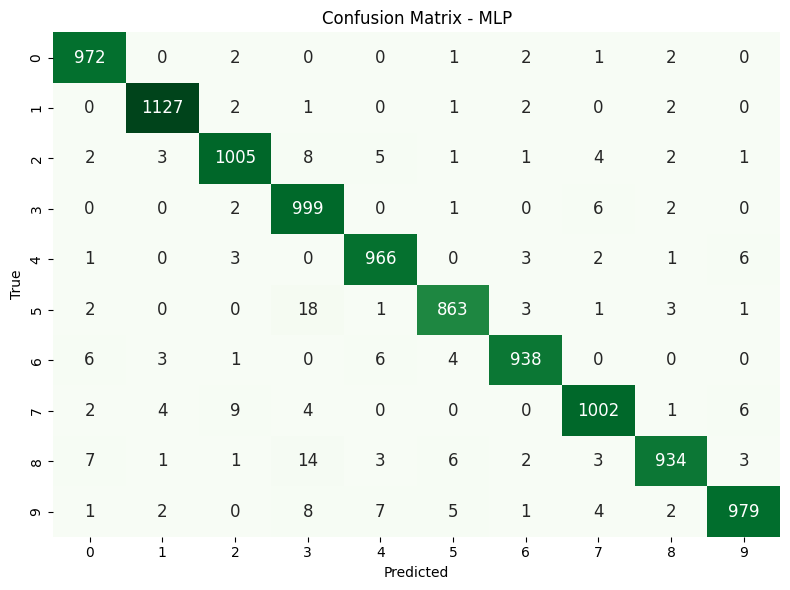

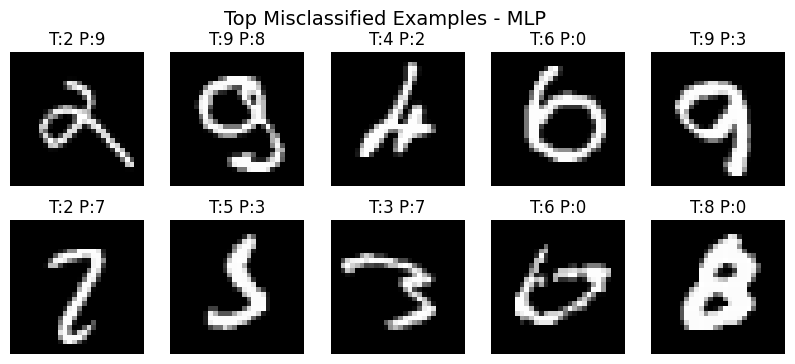

In [ ]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load data (normalize recommended for MLP)
X_train, y_train, X_test, y_test = load_mnist(normalise=True)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_train = time.time()
model.fit(X_train_flat, y_train_cat, epochs=8, batch_size=128, verbose=2)
end_train = time.time()

start_pred = time.time()
y_pred_prob = model.predict(X_test_flat)
y_pred_mlp = np.argmax(y_pred_prob, axis=1)
end_pred = time.time()

acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"\n Test Accuracy: {acc_mlp:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

print("\n Classification Report:")
print(classification_report(y_test, y_pred_mlp))

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens", cbar=False, annot_kws={"size": 12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLP")
plt.tight_layout()
plt.show()

misclassified_idx_mlp = np.where(y_pred_mlp != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx_mlp[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_mlp[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Examples - MLP", fontsize=14)
plt.show()
